# Merge ranking files 

for housing and school

In [1]:
import os
import pandas as pd

In [2]:
# filenames
housing_rank_file = os.path.join("Results","house_rent_ranking.csv")
school_rank_file = os.path.join("Results","school_ranking.csv")

In [3]:
housing_rank = pd.read_csv(housing_rank_file)
school_rank = pd.read_csv(school_rank_file)

In [4]:
housing_rank

,City,own,rent
0,Raleigh,8,8
1,Austin,7,7
2,Washington DC,6,6
3,Atlanta,5,4
4,Chicago,4,5
5,New York,3,2
6,Boston,2,3
7,Los Angeles,1,1


In [5]:
school_rank

,City,schools,college
0,Los Angeles,8,7
1,Austin,7,3
2,Atlanta,6,6
3,Washington DC,5,2
4,New York,4,5
5,Raleigh,3,8
6,Chicago,2,1
7,Boston,1,4


In [6]:
# INSERT HERE other ranking files 

In [7]:
# combine ranking into one file
combined_rank = housing_rank.merge(school_rank, on='City')


In [8]:
#INSERT HERE
# repeat merging (above cell) with additional csv that have been read
# sample combined_rank = combined_rank.merge(other_rank, on='City')


In [9]:
c = combined_rank.set_index("City")
c

,own,rent,schools,college
City,,,,
Raleigh,8,8,3,8
Austin,7,7,7,3
Washington DC,6,6,5,2
Atlanta,5,4,6,6
Chicago,4,5,2,1
New York,3,2,4,5
Boston,2,3,1,4
Los Angeles,1,1,8,7


In [10]:
## Write to CSV fike the combined rank

combined_rank_file = os.path.join("Results","house_afford_school_ranking.csv")
c.to_csv(combined_rank_file)

# SAMPLE  Visualize Combined Ranking

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
# read input from CSV
c = pd.read_csv(combined_rank_file)
c

,City,own,rent,schools,college
0,Raleigh,8,8,3,8
1,Austin,7,7,7,3
2,Washington DC,6,6,5,2
3,Atlanta,5,4,6,6
4,Chicago,4,5,2,1
5,New York,3,2,4,5
6,Boston,2,3,1,4
7,Los Angeles,1,1,8,7


In [13]:
# make the city the index
c = c.set_index('City')

In [14]:
# ensure valus are integers and not strings
c = c.apply(pd.to_numeric)

In [15]:
c

,own,rent,schools,college
City,,,,
Raleigh,8,8,3,8
Austin,7,7,7,3
Washington DC,6,6,5,2
Atlanta,5,4,6,6
Chicago,4,5,2,1
New York,3,2,4,5
Boston,2,3,1,4
Los Angeles,1,1,8,7


In [16]:
# prefix all column names with same string
for col in c.columns: 
    c=c.rename(columns={col:'rating_'+col})
c    

,rating_own,rating_rent,rating_schools,rating_college
City,,,,
Raleigh,8,8,3,8
Austin,7,7,7,3
Washington DC,6,6,5,2
Atlanta,5,4,6,6
Chicago,4,5,2,1
New York,3,2,4,5
Boston,2,3,1,4
Los Angeles,1,1,8,7


In [17]:
# prepare for visual
c = c.reset_index()
c = c.melt('City', var_name='rating', value_name='vals')


In [18]:
g = sns.factorplot(kind='bar',x="vals", y='City',hue='rating', data=c, size=10)

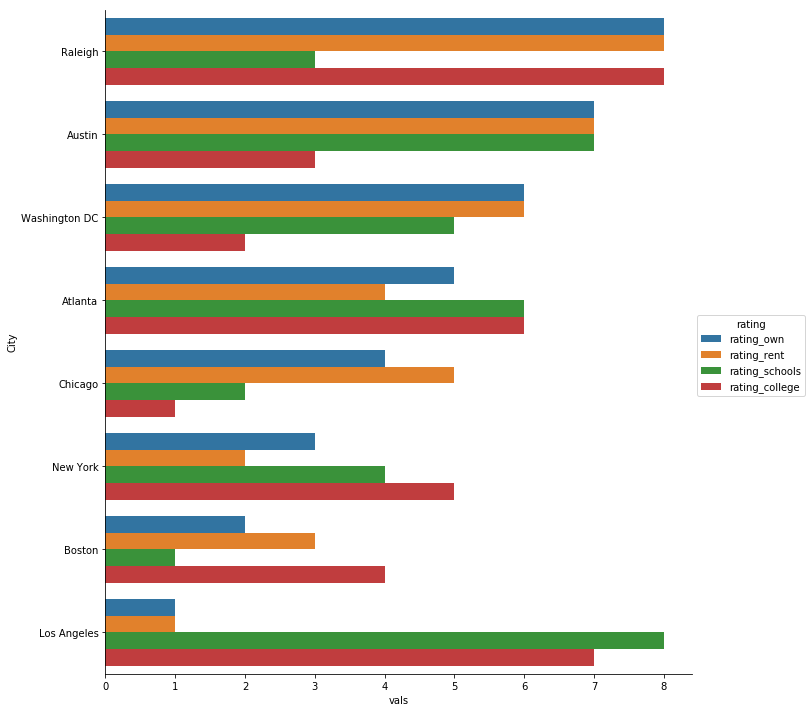

In [19]:
combined_ranking_visual = os.path.join("Plots","combined_ranking_visual.png")
plt.savefig(combined_ranking_visual)
plt.show()

# Combined final ranking

addig the rank values for each city to get a final ranking

In [20]:
# Read combined ranking dataframe
c = combined_rank.set_index("City")

In [21]:
# ensure all values are integers, note the City is intentionally the index so that it does not 
# attempt to convert a city name into integer
c= c.apply(pd.to_numeric)

In [22]:
# get names for all the rankings
columns = c.columns
columns

Index(['own', 'rent', 'schools', 'college'], dtype='object')

In [23]:
c

,own,rent,schools,college
City,,,,
Raleigh,8,8,3,8
Austin,7,7,7,3
Washington DC,6,6,5,2
Atlanta,5,4,6,6
Chicago,4,5,2,1
New York,3,2,4,5
Boston,2,3,1,4
Los Angeles,1,1,8,7


In [24]:
# Compute totals for each city

c['total']=0
for col in columns:
    c['total']=c['total']+c[col]
c    

,own,rent,schools,college,total
City,,,,,
Raleigh,8,8,3,8,27
Austin,7,7,7,3,24
Washington DC,6,6,5,2,19
Atlanta,5,4,6,6,21
Chicago,4,5,2,1,12
New York,3,2,4,5,14
Boston,2,3,1,4,10
Los Angeles,1,1,8,7,17


In [25]:
# Drop all columns, only need the totals
total = c[['total']]
total = total.sort_values('total', ascending=False)
total = total.reset_index()

In [26]:
total

,City,total
0,Raleigh,27
1,Austin,24
2,Atlanta,21
3,Washington DC,19
4,Los Angeles,17
5,New York,14
6,Chicago,12
7,Boston,10


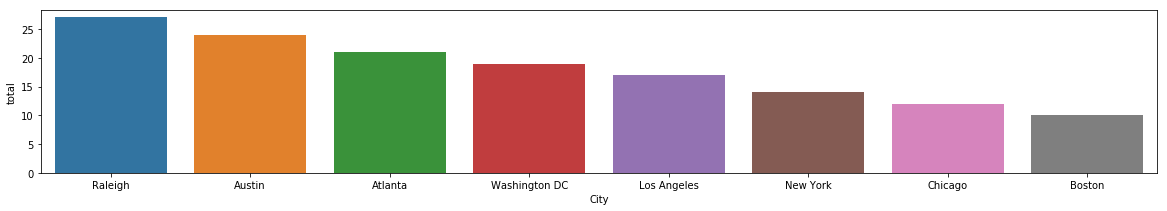

In [27]:
# plot the results
plt.figure(figsize=(20,3))
sns.barplot(x='City',y='total',data=total)
combined_ranking_visual = os.path.join("Plots","combined_total_ranking_visual.png")
plt.savefig(combined_ranking_visual)
plt.show()